# Explore Zika research through text data mining

## What is this, where am I?

This is an jupyter-notebook, an interactive programming environment for python. It consists of cells like this, which contain text, images, or executable code.

You can proceed through each cell by selecting it and pressing `Ctrl + Enter` or by clicking on the `Play` button in the menu bar. This notebook comes with "batteries included", which means it contains some example data and functions we have prepared in advance.

You don't need to know how to program in order to participate and to use this notebook. If you already know some python, please feel free to modify, change and experiment with the code and data.

You find all necessary informations on our central [FutureTDM GitHub repository](https://github.com/ContentMine/FutureTDM).

## What are we going to do?

We will explore the scientific publications downloaded as explained in the [Zika virus tutorial](https://github.com/ContentMine/FutureTDM/tutorials/zika). 

## Set up your environment
Import the prepared python functions into the notebook. If you want to know more about pyCProject, the ContentMine Python wrapper for the [CProject](https://github.com/ContentMine/workshop-resources/blob/master/software-tutorials/cproject/README.md), have a look at the [GitHub repository](https://github.com/ContentMine/pyCProject).

In [1]:
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from pycproject.readctree import CProject
from pycproject.factnet import *
import os
from collections import Counter

%matplotlib inline

**Define all functions used in the notebook:**

In [2]:
def get_word_frequencies(cproject):
    words = Counter()
    for ctree in cproject.get_ctrees():
        if 'word' in ctree.results:
            for word in ctree.results['word']['frequencies']:
                words.update({word['word'], int(word['count'])})
    return words

In [3]:
def get_pub_years(cprojects):
    years_list = []
    final_years_list = []
    max_year = 0
    min_year = 3000
    
    for cproject in cprojects:
        years = Series()
        for ctree in cproject.get_ctrees():
            year = str(ctree.first_publication_date)[2:6]
            if int(year) < min_year:
                min_year = int(year)
            if int(year) > max_year:
                max_year = int(year)
            if year in years:
                years[year] += 1
            else:
                years[year] = 1
        years_list.append(years)

    for years in years_list:
        final_years = Series()
        
        for i in range(max_year - min_year):
            if str(min_year + i) in years:
                final_years[str(min_year + i)] = years[str(min_year + i)]
            else: 
                final_years[str(min_year + i)] = 0
        
        final_years_list.append(final_years.sort_index())
    return final_years_list

In [4]:
def get_authors(cproject):
    authors = Counter()
    for ctree in cproject.get_ctrees():
        if 'authorList' in ctree.metadata:
            #print(ctree.metadata['authorList'][0]['author'])
            ctree_authors = ctree.metadata['authorList'][0]['author']
            for ctree_author in ctree_authors:
                if 'fullName' in ctree_author:
                    authors.update(ctree_author['fullName'])
    return authors

In [5]:
def get_journals(cproject):
    journals = Counter()
    for ctree in cproject.get_ctrees():
        if 'journalInfo' in ctree.metadata:
            #print(ctree.metadata['authorList'][0]['author'])
            ctree_journals = ctree.metadata['journalInfo'][0]['journal']
            for ctree_journal in ctree_journals:
                if 'title' in ctree_journal:
                    journals.update(ctree_journal['title'])
    return journals

In [6]:
def get_words(words, num_pubs):
    n_words = []
    for word, count in words.most_common(num_pubs):
        n_words.append((word, count))
    return n_words

### Reading in the datasets

In the next cell we read in the prepared data, which is located in the trialsjournal folder, into the notebook and assign it to the TRIALS variable. This data contains the results from executing the ContentMine tool chain. Each CProject itself contains many `CTrees`, one for each publication, which are the building blocks of our dataset.

In [7]:
zika = CProject("", "zika") # empty path value means we are already in the root directory
print(zika.size)

1128


In [8]:
aedesaegypti = CProject("", "aedesaegypti") # empty path value means we are already in the root directory
print(aedesaegypti.size)

245


In [9]:
usutu = CProject("", "usutu") # empty path value means we are already in the root directory
print(usutu.size)

199


## Explore the metadata

### See the publication years
Get list of publication years for each dataset and plot the timelines.

In [10]:
years = get_pub_years([zika, aedesaegypti, usutu])

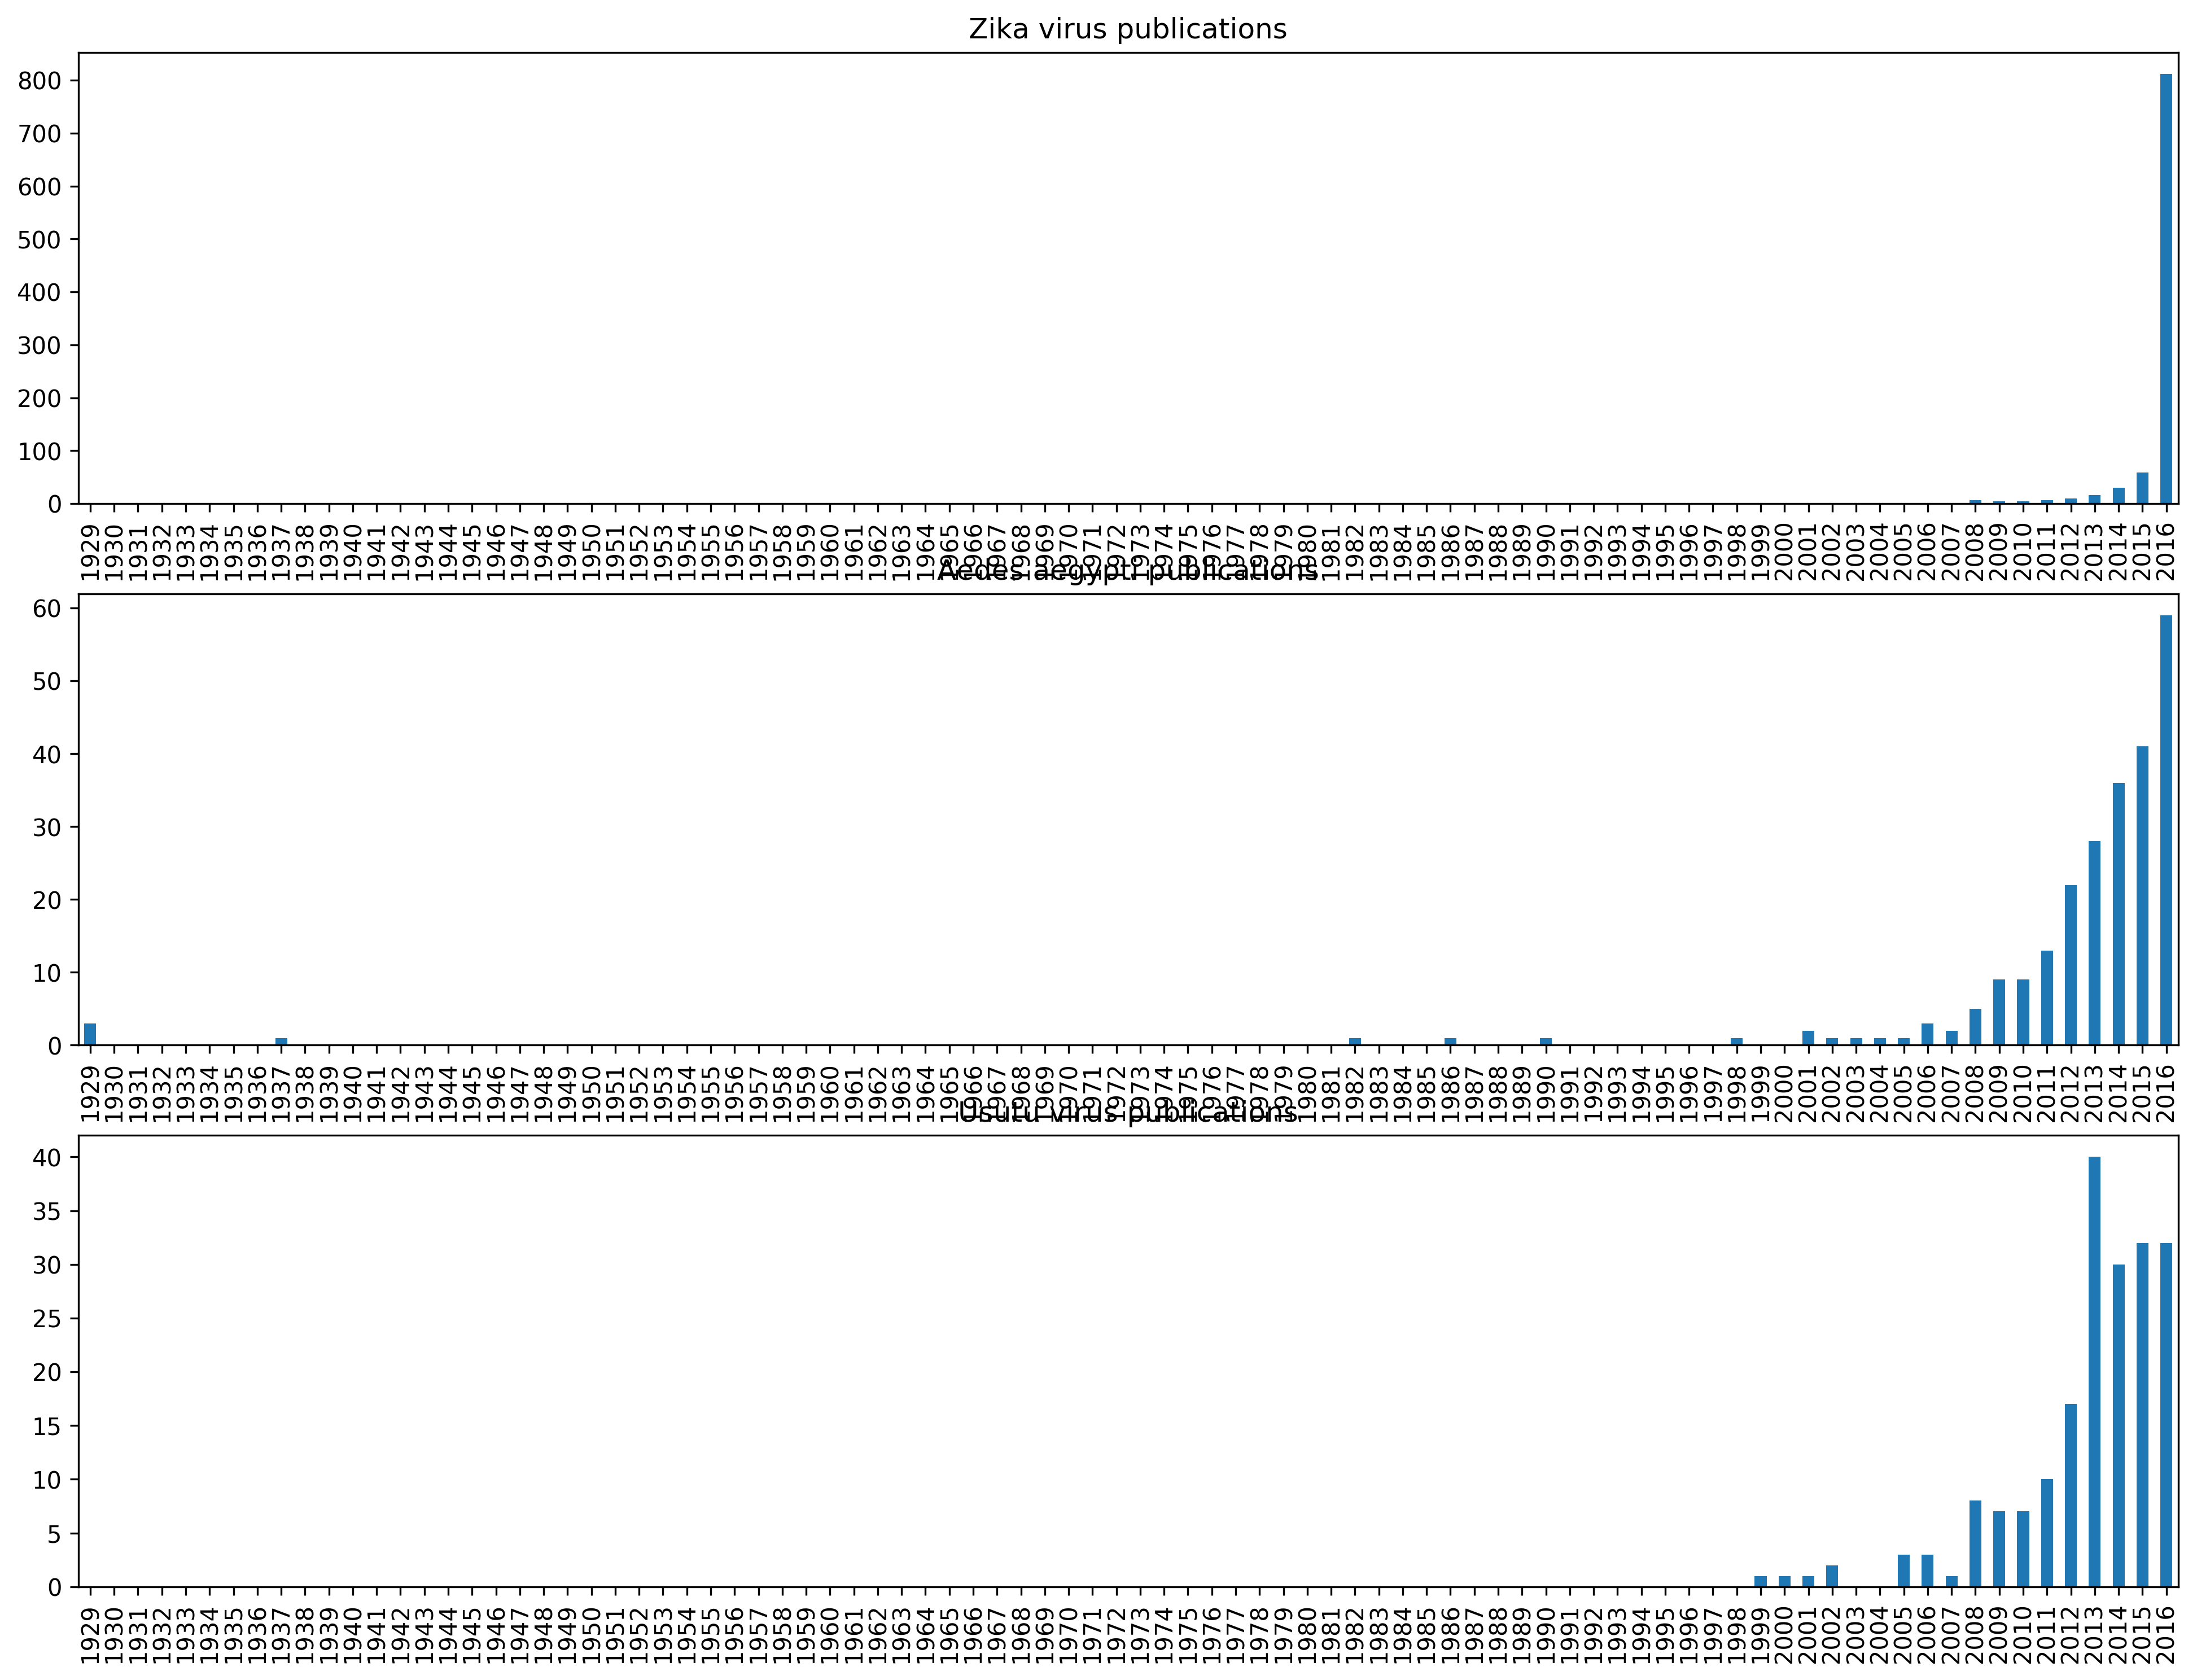

In [11]:
fig = plt.figure(figsize=(16, 12), dpi=300)

# draw subplot 1 = zika
ax1 = fig.add_subplot(3, 1, 1)
years[0].plot(kind='bar', ax=ax1)
ax1.set_title('Zika virus publications')

# draw subplot 2 = aedesaegytpi
ax2 = fig.add_subplot(3, 1, 2)
years[1].plot(kind='bar', ax=ax2)
ax2.set_title('Aedes aegypti publications')

# draw subplot 3 = usutu
ax3 = fig.add_subplot(3, 1, 3)
years[2].plot(kind='bar', ax=ax3)
ax3.set_title('Usutu virus publications')

# save plot
plt.savefig('../../images/timeline.svg')

### Explore the authors
List the most common authors.

In [12]:
zika_authors = get_authors(zika)

# num_authors = len(authors) # set to this, if you want to see all authors listed up
num_authors = 20 # change the value to your needs

for author in zika_authors.most_common()[:num_authors]:
    print(author)

('Faye O', 25)
('Sall AA', 19)
('Weaver SC', 16)
('Musso D', 11)
('de Lamballerie X', 11)
('Cao-Lormeau VM', 10)
('Leparc-Goffart I', 10)
('Aliota MT', 9)
('Osorio JE', 9)
('Diallo M', 9)
('Liu Y', 8)
('Schmidt-Chanasit J', 8)
('Tesh RB', 8)
('Megarbane B', 8)
('Brownstein JS', 7)
('Haddow AD', 7)
('Koopmans MP', 7)
('Campos GS', 7)
('Ritchie SA', 7)
('Sardi SI', 7)


In [13]:
aedesaegypti_authors = get_authors(aedesaegypti)

# num_authors = len(authors) # set to this, if you want to see all authors listed up
num_authors = 20 # change the value to your needs

for author in aedesaegypti_authors.most_common()[:num_authors]:
    print(author)

('Schaffner F', 6)
('Gould EA', 6)
('Harbach RE', 6)
('de Lamballerie X', 6)
('Kittayapong P', 5)
('Cook S', 5)
('Paupy C', 4)
('Weaver SC', 4)
('Sang R', 4)
('Kroeger A', 4)
('Lima-Camara TN', 4)
('Guillaumot L', 4)
('Lourenço-de-Oliveira R', 4)
('Le Goff G', 4)
('Reiter P', 4)
('Fontenille D', 4)
('Capelli G', 4)
('Eiras ÁE', 4)
('Walker T', 4)
('Montarsi F', 4)


In [14]:
usutu_authors = get_authors(usutu)

# num_authors = len(authors) # set to this, if you want to see all authors listed up
num_authors = 20 # change the value to your needs

for author in usutu_authors.most_common()[:num_authors]:
    print(author)

('Figuerola J', 12)
('Nowotny N', 11)
('Faye O', 10)
('Soriguer R', 9)
('Jöst H', 8)
('Ruiz S', 8)
('Saiz JC', 8)
('Gould EA', 8)
('Ziegler U', 8)
('Papa A', 8)
('Lecollinet S', 8)
('Martín-Acebes MA', 7)
('Schmidt-Chanasit J', 7)
('Becker N', 7)
('Escribano-Romero E', 7)
('Blázquez AB', 7)
('Groschup MH', 7)
('Sambri V', 6)
('Llorente F', 6)
('Roiz D', 6)


### Explore the journals

In [15]:
zika_journals = get_journals(zika)

# num_authors = len(zika_journals) # set to this, if you want to see all authors listed up
num_journals = 20 # change the value to your needs

for journal in zika_journals.most_common()[:num_journals]:
    print(journal)

('PLoS neglected tropical diseases', 136)
('Emerging infectious diseases', 77)
('PloS one', 56)
('Scientific reports', 51)
('Parasites & vectors', 39)
('Bulletin of the World Health Organization', 39)
('PLoS pathogens', 21)
('Frontiers in microbiology', 21)
('F1000Research', 20)
('PLoS currents', 20)
('BMC infectious diseases', 20)
('Virology journal', 18)
('Viruses', 17)
('EBioMedicine', 17)
('Memorias do Instituto Oswaldo Cruz', 17)
('Euro surveillance : bulletin Europeen sur les maladies transmissibles = European communicable disease bulletin', 16)
('The American journal of tropical medicine and hygiene', 15)
('mBio', 14)
('Emerging microbes & infections', 12)
('eLife', 11)


In [16]:
aedesaegypti_journals = get_journals(aedesaegypti)

# num_journals = len(aedesaegypti_journals) # set to this, if you want to see all authors listed up
num_journals = 20 # change the value to your needs

for journal in aedesaegypti_journals.most_common()[:num_journals]:
    print(journal)

('PLoS neglected tropical diseases', 50)
('Parasites & vectors', 40)
('PloS one', 34)
('Emerging infectious diseases', 10)
('Memorias do Instituto Oswaldo Cruz', 9)
('The Indian journal of medical research', 7)
('The American journal of tropical medicine and hygiene', 4)
('The Journal of experimental medicine', 4)
('Pathogens and global health', 3)
('BMC genomics', 3)
('Journal of insect science (Online)', 3)
('International journal of environmental research and public health', 3)
('Revista de saude publica', 2)
('BMC public health', 2)
('PLoS pathogens', 2)
('Journal of arthropod-borne diseases', 2)
('BMC infectious diseases', 2)
('Virology journal', 2)
('Environmental health perspectives', 2)
('Viruses', 2)


In [17]:
usutu_journals = get_journals(usutu)

# num_journals = len(usutu_journals) # set to this, if you want to see all authors listed up
num_journals = 20 # change the value to your needs

for journal in usutu_journals.most_common()[:num_journals]:
    print(journal)

('Emerging infectious diseases', 32)
('PloS one', 31)
('Parasites & vectors', 26)
('PLoS neglected tropical diseases', 16)
('Virology journal', 13)
('Veterinary research', 6)
('Viruses', 6)
('BioMed research international', 5)
('International journal of environmental research and public health', 5)
('Frontiers in microbiology', 4)
('Malaria journal', 4)
('BMC veterinary research', 4)
('Parasitology research', 3)
('Memorias do Instituto Oswaldo Cruz', 2)
('Infection ecology & epidemiology', 2)
('Frontiers in public health', 2)
('Journal of biomedicine & biotechnology', 2)
('PLoS pathogens', 2)
('BMC infectious diseases', 2)
('Ecology and evolution', 2)


## Explore the entities (species, genus, words)

### Explore the words
Print the n most common terms in the papers in decreasing order. To change the number of terms you want to have listed, just change the variable of ```first_n_pubs```.

In [18]:
zika_words = get_word_frequencies(zika)

# num_words = len(zika_words) # set to this, if you want to see all authors listed up
num_words = 20 # change the number to your needs

for word in zika_words.most_common()[:num_words]:
    print(word)

(4, 68342)
(5, 44301)
(6, 27250)
(7, 19458)
(8, 15848)
(9, 10516)
(10, 8362)
(11, 6668)
(12, 5467)
(13, 4488)
(14, 3780)
(17, 3457)
(18, 3194)
(15, 3110)
(16, 2720)
(20, 2716)
(21, 2494)
(29, 1783)
(19, 1773)
(22, 1343)


In [19]:
aedesaegypti_words = get_word_frequencies(aedesaegypti)

# num_words = len(aedesaegypti_words) # set to this, if you want to see all authors listed up
num_words = 20 # change the number to your needs

for word in aedesaegypti_words.most_common()[:num_words]:
    print(word)

(4, 17319)
(5, 11249)
(6, 7079)
(7, 5084)
(8, 4138)
(9, 2761)
(10, 2269)
(11, 1757)
(12, 1465)
(13, 1197)
(14, 1006)
(17, 877)
(15, 845)
(18, 805)
(16, 733)
(20, 689)
(21, 655)
(19, 465)
(29, 432)
(22, 373)


In [20]:
usutu_words = get_word_frequencies(usutu)

# num_words = len(usutu_words) # set to this, if you want to see all authors listed up
num_words = 20 # change the number to your needs

for word in usutu_words.most_common()[:num_words]:
    print(word)

(4, 14739)
(5, 9483)
(6, 6030)
(7, 4282)
(8, 3424)
(9, 2345)
(10, 1909)
(11, 1520)
(12, 1290)
(13, 1120)
(14, 863)
(17, 763)
(15, 751)
(18, 702)
(16, 652)
(20, 598)
(21, 543)
(19, 447)
(29, 354)
(22, 347)


Plot the frequencies as a histogram.

In [21]:
#frequ = [value for key, value in words.most_common()[500:]]

In [22]:
#plt.hist(frequ, bins=100)
#plt.title("Word Frequencies")
#plt.xlabel("Frequencies")
#plt.ylabel("Frequencies of Frequencies")
#plt.show()

### Look at

## Let's dive into the data!

First we create a network between papers and entities such as genes or genus. In this network a node is either a unique identifier of a paper, or the name of the entity. An edge or link between nodes is created when a paper mentions an entity. The entities have been identified through the [ami-plugins](https://github.com/ContentMine/ami/).

### Choose the type of entity

In [23]:
#plotBipartiteGraph(B_genus)
#plotBipartiteGraph(B_binomial)
#plotBipartiteGraph(B_genussp)

### Check the most mentioned species
Here we list up the most mentioned species in each corpus. This should give us a good overview, and as you can see, it should provide us with some information about virus-transmitters such as Aedes, Flavivirus, etc.

In [24]:
B_genus, fact_graph, paper_graph, fact_nodes, paper_nodes = create_network(zika, "species", "genus")

start_with = 0 # enter a number here
how_many = 20 # # this will give us the next 10
degreeCent = nx.algorithms.degree_centrality(fact_graph)
for node in sorted(degreeCent, key=degreeCent.get, reverse=True)[start_with:start_with+how_many]:
    print(len(B_genus.neighbors(node)), node)

290 Aedes
76 Culex
39 Drosophila
51 Anopheles
31 Plasmodium
109 Flavivirus
55 Wolbachia
10 Stegomyia
1 Montia
1 Askellia
1 Bromus
1 Silene
1 Symphyotrichum
1 Solidago
1 Anthoxanthum
1 Hulteniella
1 Arctagrostis
1 Findlay
1 Tephroseris
1 Populus


In [25]:
how_many = 20 # # this will give us the next 10
degreeCent = nx.algorithms.degree_centrality(paper_graph)
for node in sorted(degreeCent, key=degreeCent.get, reverse=True)[start_with:start_with+how_many]:
    print(len(B_genus.neighbors(node)), node)

12 PIWIs Go Viral: Arbovirus-Derived piRNAs in Vector Mosquitoes.
8 Emerging arboviruses and public health challenges in Brazil.
13 Molecular detection of flaviviruses and alphaviruses in mosquitoes (Diptera: Culicidae) from coastal ecosystems in the Colombian Caribbean.
10 Overview of Zika virus (ZIKV) infection in regards to the Brazilian epidemic.
5 Zika Virus: Transmission, Detection, Control, and Prevention.
5 The Emergence of Zika Virus as a Global Health Security Threat: A Review and a Consensus Statement of the INDUSEM Joint working Group (JWG).
7 Development of one-step quantitative reverse transcription PCR for the rapid detection of flaviviruses.
5 The RNAi pathway plays a small part in Wolbachia-mediated blocking of dengue virus in mosquito cells.
4 Flaviviruses in Europe: complex circulation patterns and their consequences for the diagnosis and control of West Nile disease.
5 Virus-derived DNA drives mosquito vector tolerance to arboviral infection.
8 Wolbachia Biocontrol 

In [26]:
B_binomial, fact_graph, paper_graph, fact_nodes, paper_nodes = create_network(zika, "species", "binomial")

start_with = 0 # enter a number here
how_many = 20 # # this will give us the next 10
degreeCent = nx.algorithms.degree_centrality(fact_graph)
for node in sorted(degreeCent, key=degreeCent.get, reverse=True)[start_with:start_with+how_many]:
    print(len(B_binomial.neighbors(node)), node)

360 Aedes aegypti
234 Ae. aegypti
210 Aedes albopictus
176 Ae. albopictus
2 Juncus biglumis
1 Micranthes nelsoniana
1 Eremogone capillaris
1 Crepis nana
1 Carex petricosa
1 Draba oligosperma
1 Antennaria friesiana
1 Tephroseris frigida
1 Pedicularis arctica
1 Anthoxanthum hirtum
1 Hedysarum mackenzii
1 Eriophorum triste
1 Nephroma expallidum
1 Hierochloe alpina
1 Lycopodium annotinum
1 Packera hyperborealis


In [27]:
B_genussp, fact_graph, paper_graph, fact_nodes, paper_nodes = create_network(zika, "species", "genussp")

start_with = 0 # enter a number here
how_many = 20 # # this will give us the next 10
degreeCent = nx.algorithms.degree_centrality(fact_graph)
for node in sorted(degreeCent, key=degreeCent.get, reverse=True)[start_with:start_with+how_many]:
    print(node, len(B_genussp.neighbors(node)))

Aedes spp 62
Culex spp 22
Aedes sp 15
Culex sp 9
Ixodes spp 3
Limatus sp 1
Psorophora sp 1
Psorophoraspp 1
Galindomyia sp 1
Psorophora spp 2
Sabethes spp 1
Culexspp 1
Uranotaenia sp 1
Haemagogusspp 1
Mansonia spp 3
Anopheles sp 5
Ankistrodesmus sp 1
Lepadella sp 1
Coleps spp 1
Anabaena sp 1


## Get all publications where a specific entity is mentioned
Now we want to explore, in which publications an entity was mentioned. Pick a name from the list above!

**Choose one specific entity for your further analysis.**

Change the string to your chosen species. Beware: If you choose one with more than 5 neighbors it should give you some interesting results.

In [28]:
B_genus, fact_graph, paper_graph, fact_nodes, paper_nodes = create_network(zika, "species", "genus")
# B_genus, fact_graph, paper_graph, fact_nodes, paper_nodes = create_network(aedesaegypti, "species", "genus")
# B_genus, fact_graph, paper_graph, fact_nodes, paper_nodes = create_network(usutu, "species", "genus")

my_species = "Culex"
my_species in fact_nodes

True

In [29]:
print("Number of neighbors:", len(B_genus.neighbors(my_species)))
for idx, neighbor in enumerate(B_genus.neighbors(my_species)):
    print(idx, ':', neighbor)

Number of neighbors: 76
0 : Vector Competence of American Mosquitoes for Three Strains of Zika Virus.
1 : Surveillance of Mosquitoes and Selected Arthropod-Borne Viruses in the Context of Milan EXPO 2015.
2 : Size, sounds and sex: interactions between body size and harmonic convergence signals determine mating success in Aedes aegypti.
3 : Making Mosquito Taxonomy Useful: A Stable Classification of Tribe Aedini that Balances Utility with Current Knowledge of Evolutionary Relationships.
4 : Assessment of ICount software, a precise and fast egg counting tool for the mosquito vector Aedes aegypti.
5 : Discovery of flavivirus-derived endogenous viral elements in Anopheles mosquito genomes supports the existence of Anopheles-associated insect-specific flaviviruses.
6 : A Cluster-Randomized Controlled Trial to Reduce Diarrheal Disease and Dengue Entomological Risk Factors in Rural Primary Schools in Colombia.
7 : Culex mosquitoes are experimentally unable to transmit Zika virus.
8 : Zika mos

## Find local communities of species
We identify the three biggest communities of entities and plot them separately. A community subgraph is a collection of e.g. persons that are connected with each other, but not with the rest of the network. It also prints the location/organization/perons with the most connections in the community.

Aedes


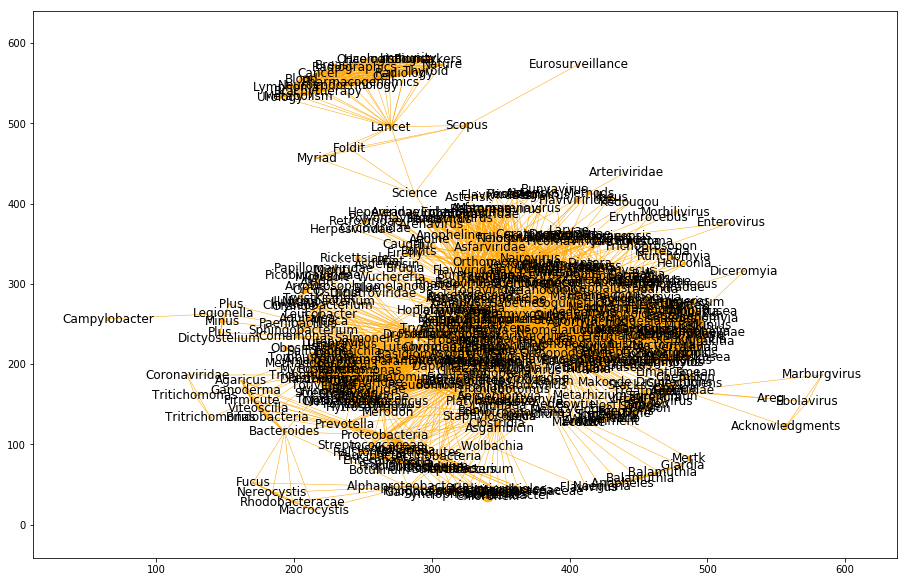

Findlay


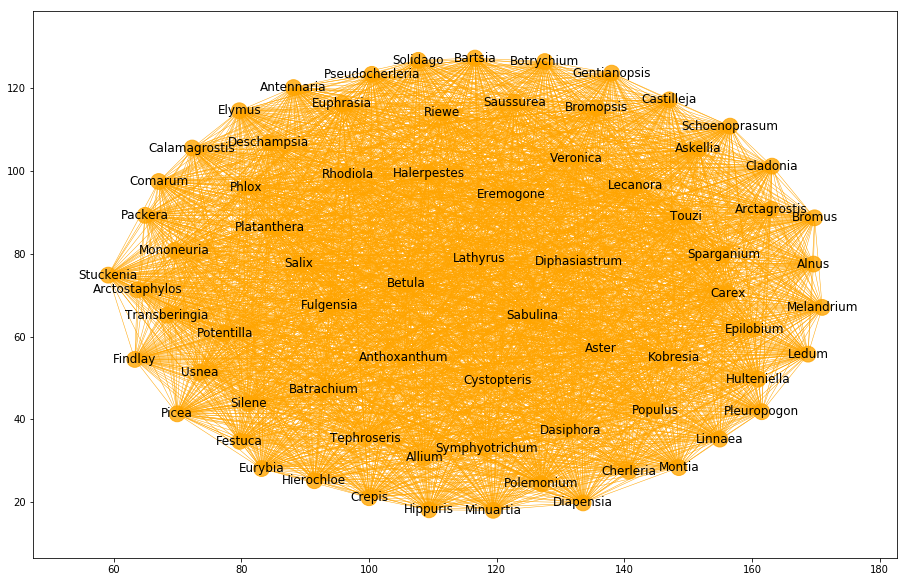

Crataegus


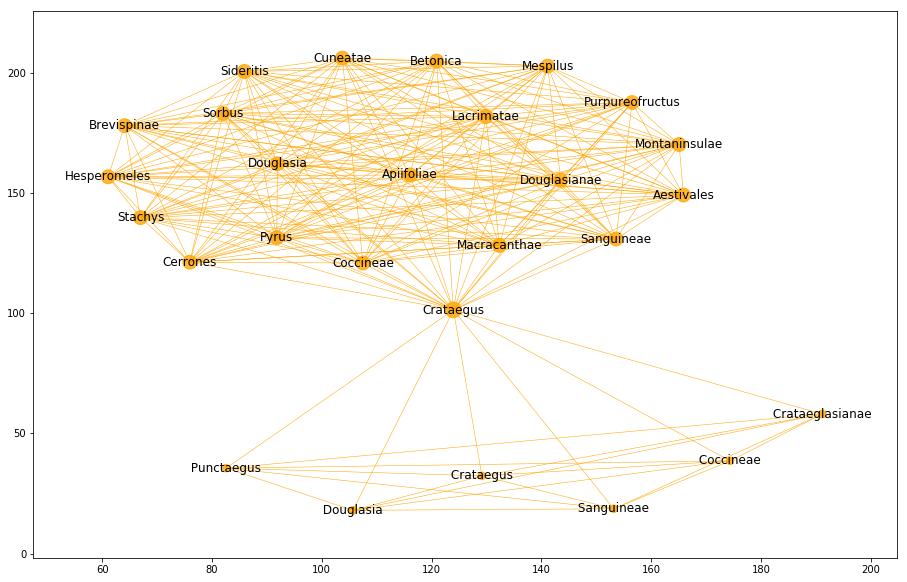

In [30]:
B_genus, fact_graph, paper_graph, fact_nodes, paper_nodes = create_network(zika, "species", "genus")
# B_genus, fact_graph, paper_graph, fact_nodes, paper_nodes = create_network(aedesaegypti, "species", "genus")
# B_genus, fact_graph, paper_graph, fact_nodes, paper_nodes = create_network(usutu, "species", "genus")

start_with = 0 # pick a number between 1 and 50
how_many = 3 # choose the number of communities you want to plot between 1 and 5. More takes a lot of space in your notebook
subgraphs = sorted(nx.connected_component_subgraphs(fact_graph), key=len, reverse=True)[start_with:start_with+how_many]
for sg in subgraphs:
    degreeCent = nx.algorithms.degree_centrality(sg)
    print(max(degreeCent, key=degreeCent.get))
    plotGraph(sg, "orange").show() # choose a color, e.g. red, blue, green, ...

### Your network
The next cell creates a high resolution visualization of the network around your chosen organization/person/location, where related facts, papers they are mentioned in, and also the authors who wrote the papers are visualized. The network will also be saved onto your disk for further usage, like wallpapers, blogging or documentation. You can find it in the MozFest2015 folder.

Don't forget to choose a color!

In [31]:
#your_graph = create_subgraph(TRIALS, B_genus, B_genus, your_variable)
#save_graph(your_graph, "orange")

## Put a fact into context

In the next cell you can enter an institution/location/person of you interest, and see in which papers they are mentioned, what their titles are. Depending on how busy it was, the list can get a bit long! You can look into the `trialsjournal` folder, open the sbfolder with the ID, and compare it with the acknowledgements section of the paper.

In [32]:
# your_variable = "Japan"
#for ID in B.neighbors(your_variable):
#    print ID, TRIALS.get_title(ID)
#    print TRIALS.get_ctree(ID).get_section("Acknowledgements")

In [33]:
%%capture
M, fact_graph, paper_graph, fact_nodes, paper_nodes = create_complete_graph(zika)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.4/dist-packages/matplotlib/pyplot.py'>

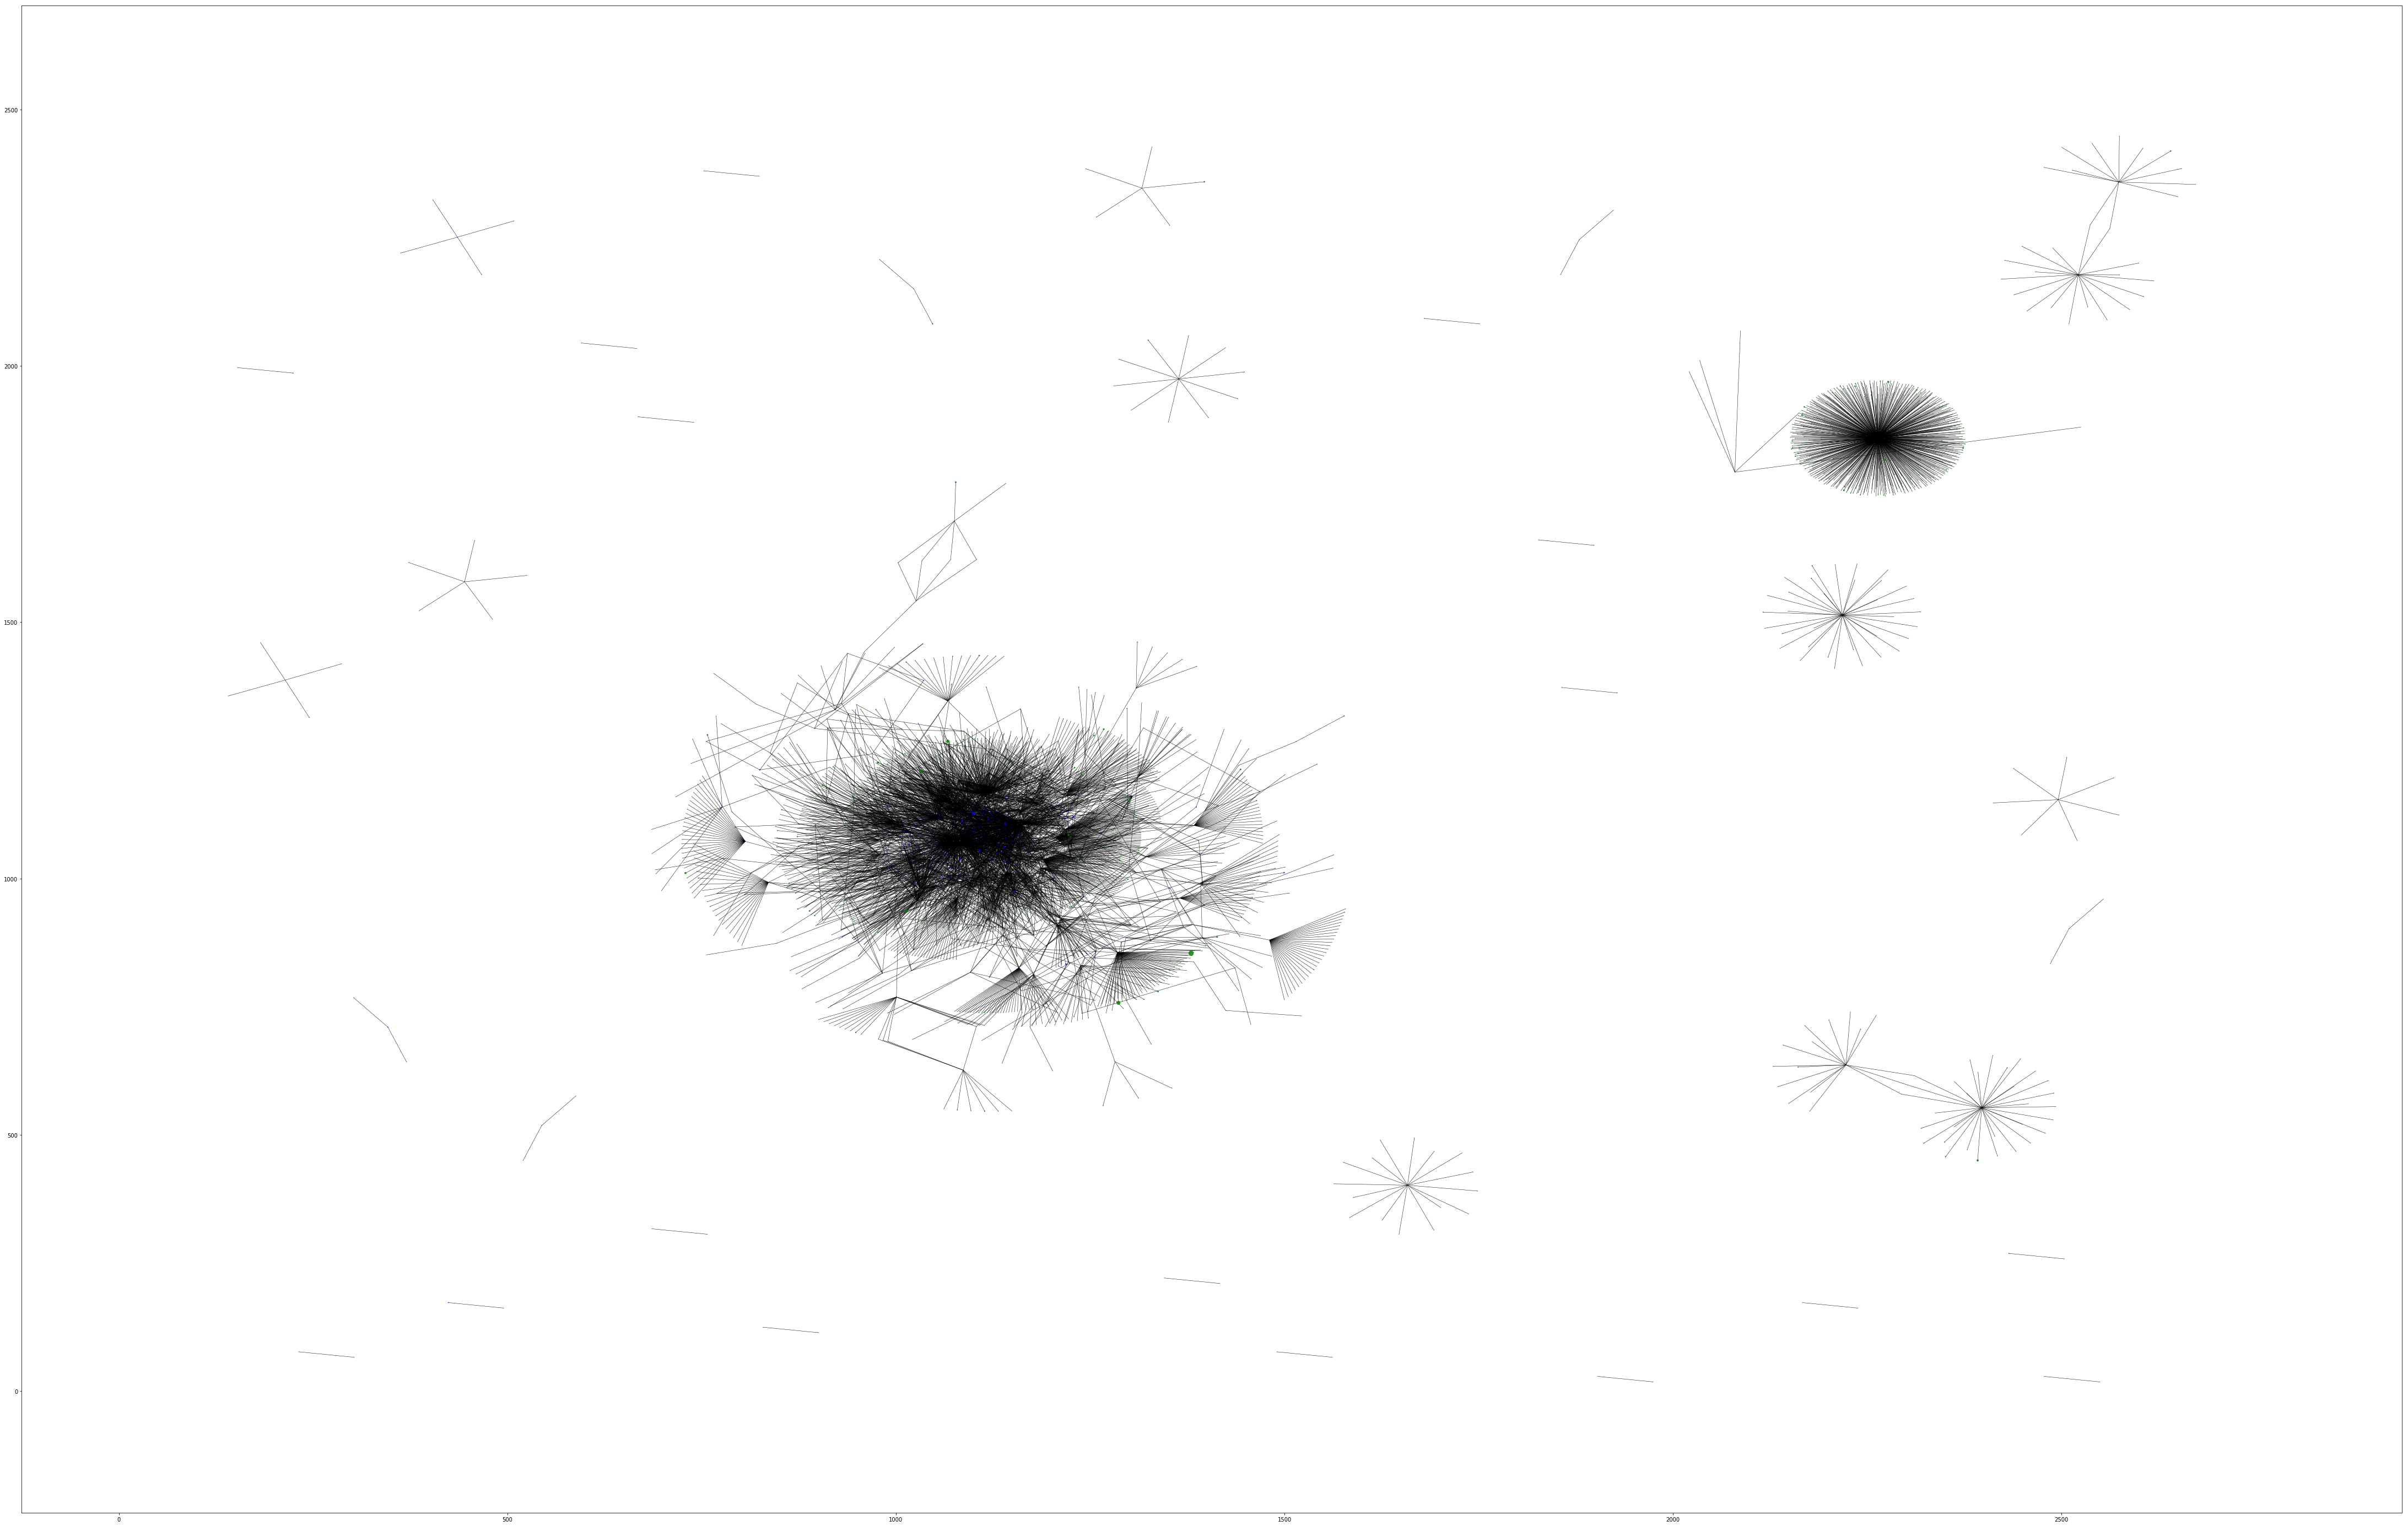

In [34]:
plotMultipartiteGraph(M)